# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re

### 2. Import Dataset

In [56]:
df_cyber = pd.read_csv("Datasets/classified_tweets.csv")

### 3.  Check first 10 lines

In [57]:
df_cyber.head(10)

,text,suspicious,cyberbullying,hate,suicidal
0,Uhmm like 6th grade on a corner of a street....,0,0,0,0
1,a) JTP is a douchebag b) Stewart kicks ass!,1,0,0,0
2,ditto bitch!,1,0,0,0
3,damn I have to drive my dad to the airport tha...,0,0,0,0
4,:],0,0,0,0
5,Hahaa.. Very true.. It might just be some cond...,0,0,0,0
6,damn your Jedi mind tricks!,1,0,0,0
7,OMG that sucks! D:,1,0,0,0
8,If you could have anyone locked in a room so ...,0,0,0,0
9,umm a homeless guys with blackberry haha,0,0,0,0


### 4. Check Datasets type values and sum & drop duplicates

In [58]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [59]:
df_cyber.shape

(19934, 5)

In [60]:
df_cyber.isnull().sum()

text             0
suspicious       0
cyberbullying    0
hate             0
suicidal         0
dtype: int64

In [61]:
df_cyber.text.duplicated().sum()

1727

In [62]:
df_cyber.duplicated(subset='text').sum()

1727

In [63]:
# df_cyber = df_cyber.drop_duplicates(keep='first')

In [64]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19934 non-null  object
 1   suspicious     19934 non-null  int64 
 2   cyberbullying  19934 non-null  int64 
 3   hate           19934 non-null  int64 
 4   suicidal       19934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 778.8+ KB


In [65]:
df_cyber = df_cyber.drop(columns=['suspicious','hate','suicidal'])
df_cyber = df_cyber.rename(columns=({'text':'content'}))
df_cyber = df_cyber.rename(columns=({'cyberbullying':'annotation'}))
df_cyber["annotation"] = df_cyber["annotation"].replace({2: 1})

In [66]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     19934 non-null  object
 1   annotation  19934 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 311.6+ KB


In [67]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

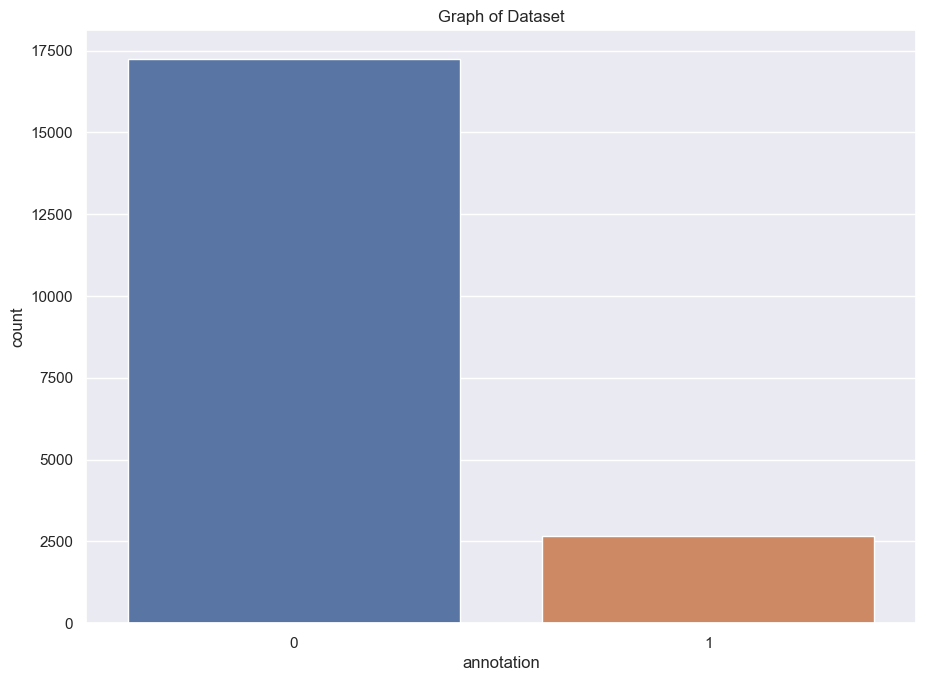

In [68]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation',data=df_cyber).set(title="Graph of Dataset")

### 6.  WordCloud of Dataset

In [69]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # Remove emoji's
    tweet = re.sub(r':[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [70]:
df_cyber["content"] = df_cyber["content"].apply(clean_tweets)
df_cyber.head(30)

,content,annotation
0,Uhmm like th grade on a corner of a street I...,0
1,a JTP is a douchebag b Stewart kicks ass,0
2,ditto bitch,0
3,damn I have to drive my dad to the airport tha...,0
4,,0
5,Hahaa Very true It might just be some condensa...,0
6,damn your Jedi mind tricks,0
7,OMG that sucks D,0
8,If you could have anyone locked in a room so ...,0
9,umm a homeless guys with blackberry haha,0


In [71]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 0 to 19933
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     19779 non-null  object
 1   annotation  19779 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 463.6+ KB


In [72]:
df_cyber.head(30)

,content,annotation
0,Uhmm like th grade on a corner of a street I...,0
1,a JTP is a douchebag b Stewart kicks ass,0
2,ditto bitch,0
3,damn I have to drive my dad to the airport tha...,0
4,,0
5,Hahaa Very true It might just be some condensa...,0
6,damn your Jedi mind tricks,0
7,OMG that sucks D,0
8,If you could have anyone locked in a room so ...,0
9,umm a homeless guys with blackberry haha,0


### 7. Stopwords

In [73]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [75]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                          for token in str(sentence).split()
                                          if token not in stopwords.words('english')))

    return preprocessed_text

In [76]:
preprocessed_review = preprocess_text(df_cyber['content'].values)
df_cyber['content']= preprocessed_review

100%|██████████| 19779/19779 [00:57<00:00, 344.12it/s]


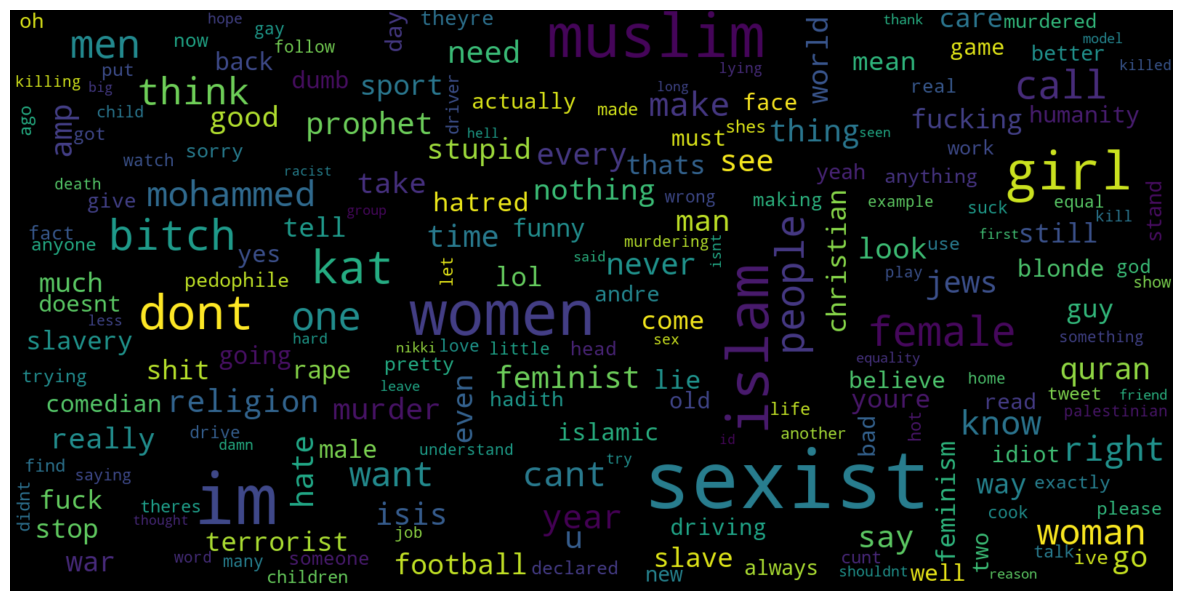

In [77]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

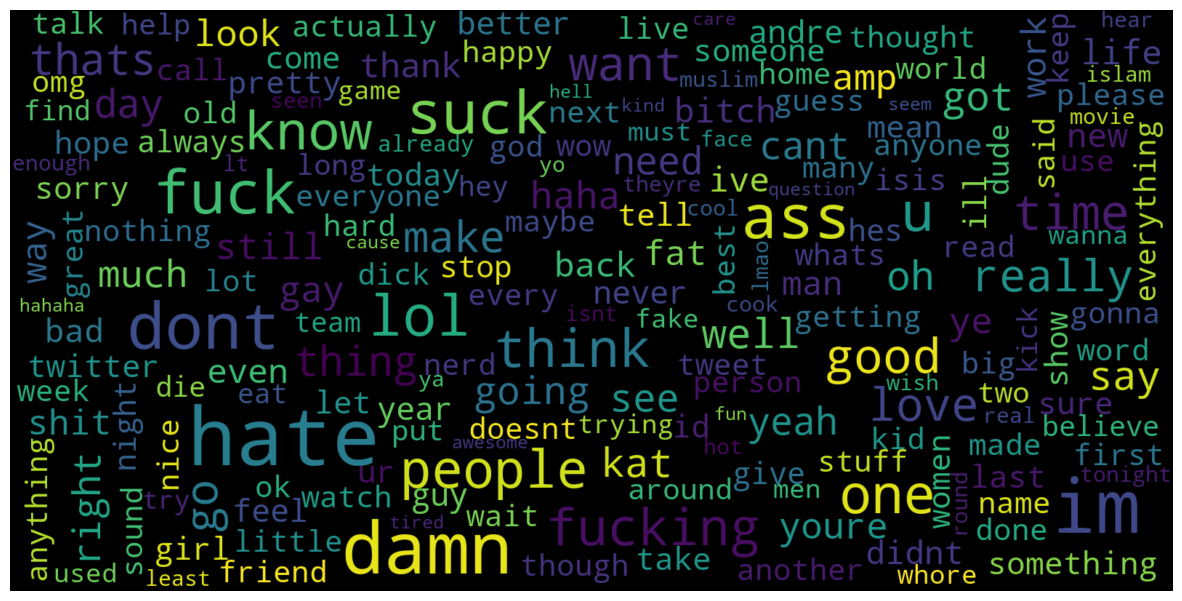

In [78]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

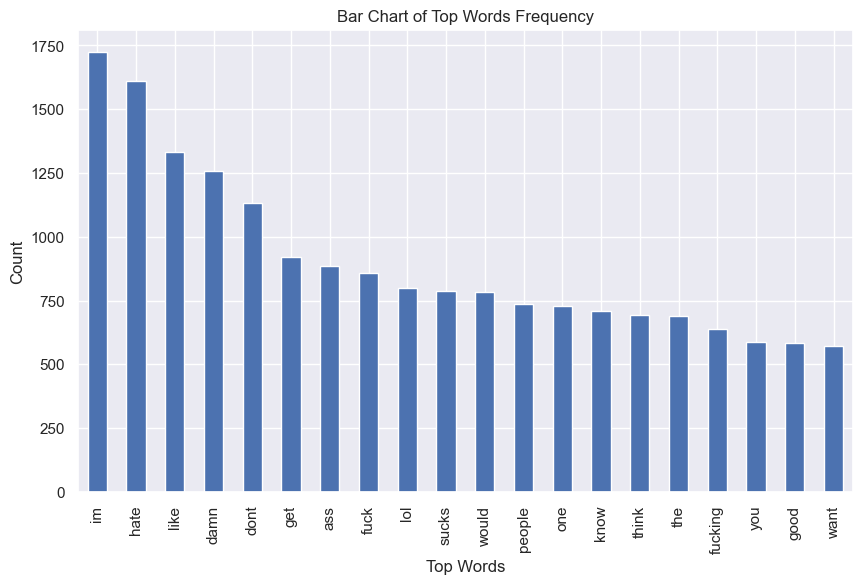

In [79]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['content'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['content'],
                                                    df_cyber['annotation'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [81]:
x_train.shape

(15823,)

In [82]:
x_test.shape

(3956,)

In [83]:
y_train.shape

(15823,)

In [84]:
y_test.shape

(3956,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vectorization = CountVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [86]:
print(x_train)

  (0, 18020)	1
  (0, 658)	1
  (0, 14348)	1
  (0, 16284)	1
  (0, 3812)	1
  (0, 13030)	1
  (0, 11609)	1
  (0, 16665)	1
  (0, 3950)	1
  (0, 3865)	1
  (0, 382)	1
  (1, 14851)	1
  (1, 6285)	1
  (1, 12764)	1
  (1, 12031)	1
  (1, 299)	1
  (2, 16665)	1
  (2, 17741)	1
  (2, 15021)	1
  (2, 15729)	1
  (2, 1340)	1
  (2, 7849)	1
  (2, 14149)	1
  (2, 15704)	1
  (2, 14101)	1
  :	:
  (15821, 12777)	1
  (15821, 8844)	1
  (15821, 7803)	1
  (15821, 12947)	1
  (15821, 17307)	1
  (15821, 5785)	1
  (15821, 16069)	1
  (15821, 7166)	1
  (15821, 12479)	1
  (15821, 9577)	1
  (15822, 3865)	1
  (15822, 7849)	1
  (15822, 7146)	1
  (15822, 6616)	1
  (15822, 1189)	1
  (15822, 17871)	1
  (15822, 10978)	1
  (15822, 6651)	1
  (15822, 7097)	1
  (15822, 7288)	1
  (15822, 17866)	1
  (15822, 7259)	1
  (15822, 16441)	1
  (15822, 9896)	1
  (15822, 9092)	1


In [87]:
print(x_test)

  (0, 868)	1
  (0, 1692)	1
  (0, 2440)	1
  (0, 2725)	1
  (0, 6894)	1
  (0, 7525)	1
  (0, 7552)	1
  (0, 7849)	1
  (0, 8648)	1
  (0, 9209)	1
  (0, 13848)	1
  (0, 14827)	1
  (0, 15870)	1
  (0, 16185)	1
  (0, 16665)	1
  (1, 1625)	1
  (1, 6267)	1
  (1, 6621)	1
  (1, 10946)	1
  (1, 15416)	1
  (1, 15949)	1
  (1, 16185)	2
  (1, 17833)	1
  (2, 3729)	1
  (2, 7066)	1
  :	:
  (3951, 2905)	1
  (3951, 3731)	1
  (3951, 8764)	1
  (3951, 11695)	1
  (3951, 12485)	1
  (3952, 6085)	1
  (3952, 9442)	1
  (3952, 11149)	1
  (3952, 17462)	1
  (3953, 468)	1
  (3953, 3945)	2
  (3953, 5296)	1
  (3953, 9240)	1
  (3953, 9323)	1
  (3953, 16216)	1
  (3954, 8308)	1
  (3955, 6230)	1
  (3955, 6241)	1
  (3955, 11224)	1
  (3955, 12725)	1
  (3955, 15865)	1
  (3955, 16054)	1
  (3955, 17307)	1
  (3955, 17310)	1
  (3955, 18073)	1


### Logistic Regression (LR)

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9605005371926941
0.910768452982811


In [89]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3614
           1       0.49      0.73      0.59       342

    accuracy                           0.91      3956
   macro avg       0.73      0.83      0.77      3956
weighted avg       0.93      0.91      0.92      3956



### Desicion Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9986096189091829
0.8890293225480284


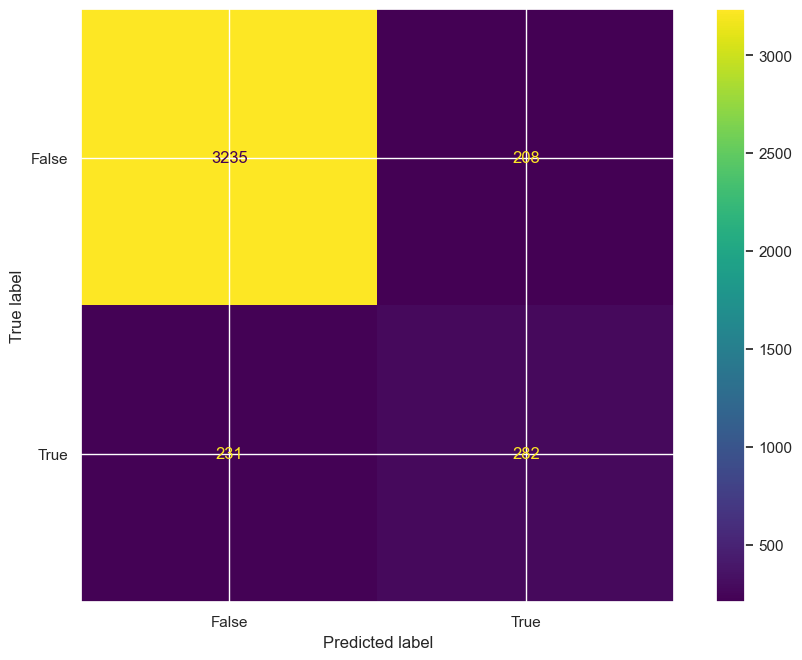

In [91]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [92]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3466
           1       0.55      0.58      0.56       490

    accuracy                           0.89      3956
   macro avg       0.74      0.75      0.75      3956
weighted avg       0.89      0.89      0.89      3956



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9967136446944321
0.9092517694641051


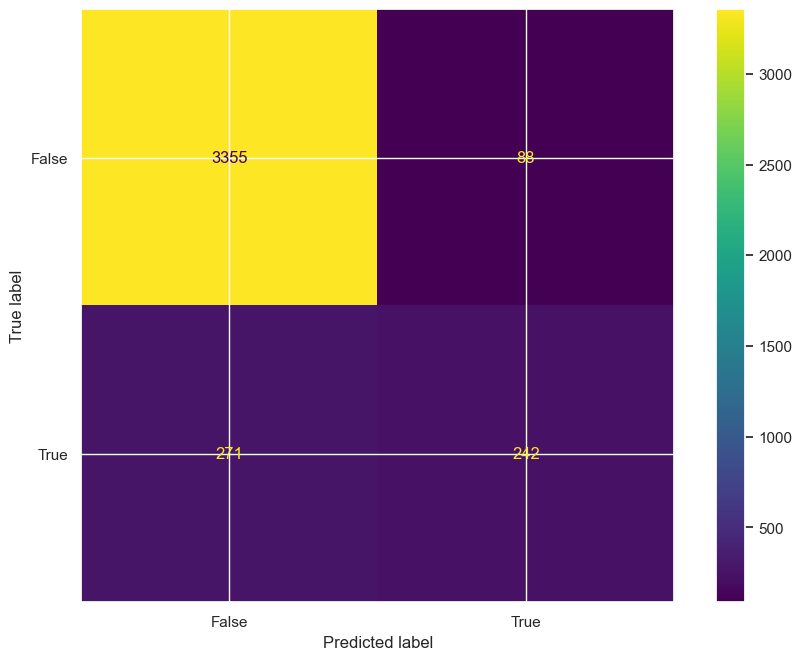

In [94]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [95]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3626
           1       0.47      0.73      0.57       330

    accuracy                           0.91      3956
   macro avg       0.72      0.83      0.76      3956
weighted avg       0.93      0.91      0.92      3956



### XGBoost

In [96]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [97]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9246666245339064
0.9138018200202225


In [98]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3646
           1       0.47      0.78      0.59       310

    accuracy                           0.91      3956
   macro avg       0.72      0.85      0.77      3956
weighted avg       0.94      0.91      0.92      3956



### Multinomial Naive Bayes

In [99]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9352840801365101
0.9039433771486349


In [100]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3587
           1       0.49      0.68      0.57       369

    accuracy                           0.90      3956
   macro avg       0.73      0.80      0.76      3956
weighted avg       0.92      0.90      0.91      3956



### Support Vector Machine

In [101]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9842002148770777
0.9024266936299292


In [102]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3501
           1       0.57      0.64      0.60       455

    accuracy                           0.90      3956
   macro avg       0.76      0.79      0.77      3956
weighted avg       0.91      0.90      0.90      3956



### K-Nearest Neighbours

In [103]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8857359539910257
0.878412537917088


In [104]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3892
           1       0.09      0.75      0.17        64

    accuracy                           0.88      3956
   macro avg       0.54      0.82      0.55      3956
weighted avg       0.98      0.88      0.92      3956



### Bagging Decision Tree (Ensemble Learning I)

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9780066991088922
0.9095045500505561


In [106]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3545
           1       0.55      0.69      0.61       411

    accuracy                           0.91      3956
   macro avg       0.76      0.81      0.78      3956
weighted avg       0.92      0.91      0.91      3956



### Boosting Decision Tree (Ensemble Learning II)

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9986096189091829
0.8940849342770475


In [108]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3584
           1       0.45      0.63      0.53       372

    accuracy                           0.89      3956
   macro avg       0.71      0.77      0.73      3956
weighted avg       0.91      0.89      0.90      3956

